In [149]:
!pip install yfinance
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [150]:
import yfinance as yf
from datetime import datetime

In [151]:
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [152]:
stock = "GOOG"
google_data = yf.download(
    stock,
    start=start,
    end=end,
    auto_adjust=False,
    group_by="column",
    progress=False,
    threads=False
)


In [153]:
# Normalize the output to a simple Date index + flat columns
import pandas as pd

# Flatten the MultiIndex columns if present
if isinstance(google_data.columns, pd.MultiIndex):
    google_data.columns = google_data.columns.get_level_values(0)

# If index is MultiIndex, keep only Date
if isinstance(google_data.index, pd.MultiIndex):
    google_data = google_data.reset_index()
    if 'Date' in google_data.columns:
        google_data = google_data.set_index('Date')

# Ensure Adj Close exists; if not, re-download
if "Adj Close" not in google_data.columns:
    _tmp = yf.download(stock, start=start, end=end, auto_adjust=False, group_by="column", progress=False, threads=False)
    if isinstance(_tmp.columns, pd.MultiIndex):
        _tmp.columns = _tmp.columns.get_level_values(0)
    google_data = _tmp.copy()

# Sort by date and ensure numeric dtypes
google_data = google_data.sort_index()
for c in google_data.columns:
    google_data[c] = pd.to_numeric(google_data[c], errors="coerce")


In [154]:
google_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2005-08-29,7.141869,7.184321,7.201009,7.029651,7.029651,237005036
2005-08-30,7.112654,7.154932,7.210722,7.120311,7.157920,192398464
2005-08-31,7.081209,7.123300,7.185567,7.082453,7.178842,202114747
2005-09-01,7.087398,7.129527,7.160660,7.098393,7.121059,110095123
2005-09-02,7.141869,7.184321,7.222678,7.134259,7.136003,137894934


In [155]:
google_data.shape

(5032, 6)

In [156]:
google_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
count,5032.000000,5032.000000,5032.000000,5032.000000,5032.000000,5.032000e+03
mean,54.092585,54.375887,54.936403,53.797191,54.351349,9.464063e+07
std,51.187992,51.399074,51.953720,50.831617,51.362928,1.184138e+08
min,6.374077,6.411966,6.709103,6.159413,6.538243,1.584340e+05
25%,14.081329,14.165031,14.283649,14.042117,14.161170,2.561150e+07
50%,31.304670,31.490749,31.807250,31.177250,31.584500,4.413643e+07
75%,75.467163,75.915749,76.587448,75.267090,75.779999,1.177628e+08
max,212.369995,212.369995,212.899994,207.600006,208.369995,1.650833e+09


In [157]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5032 entries, 2005-08-29 to 2025-08-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  5032 non-null   float64
 1   Close      5032 non-null   float64
 2   High       5032 non-null   float64
 3   Low        5032 non-null   float64
 4   Open       5032 non-null   float64
 5   Volume     5032 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.2 KB


In [158]:
google_data.isnull().sum()

Price
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [159]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing Price of Google data')

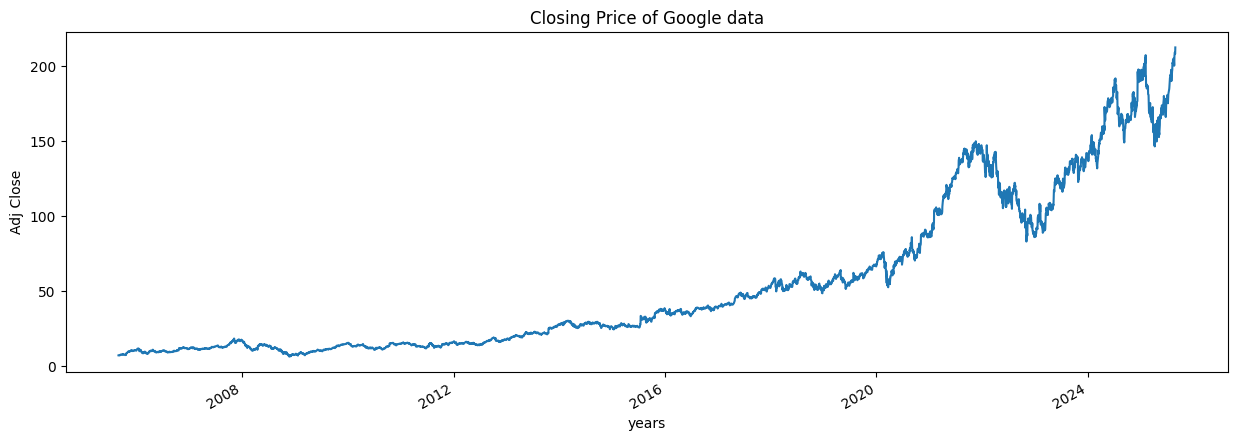

In [160]:
plt.figure(figsize=(15,5))
google_data["Adj Close"].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing Price of Google data")

In [161]:
def plot_graph(figsize,values, column_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [162]:
google_data.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

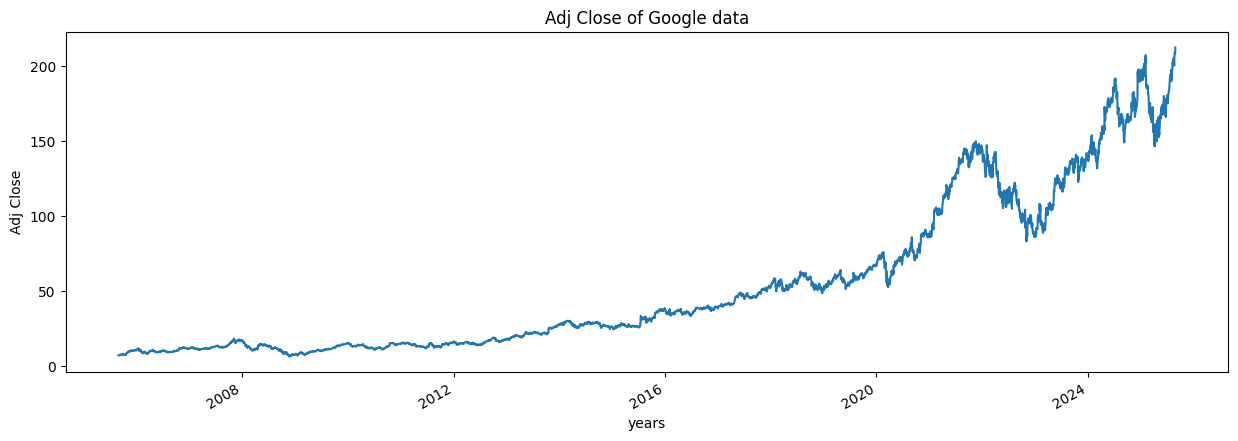

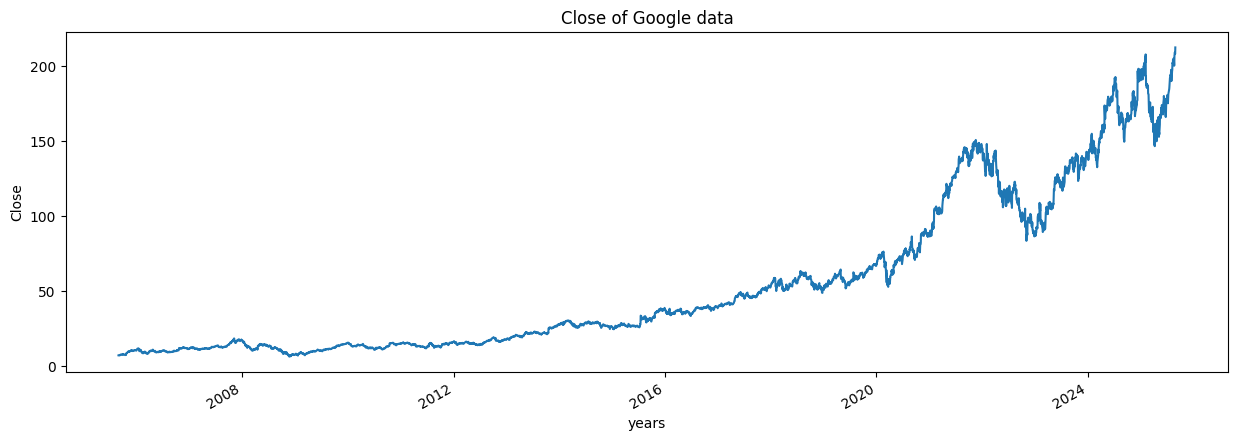

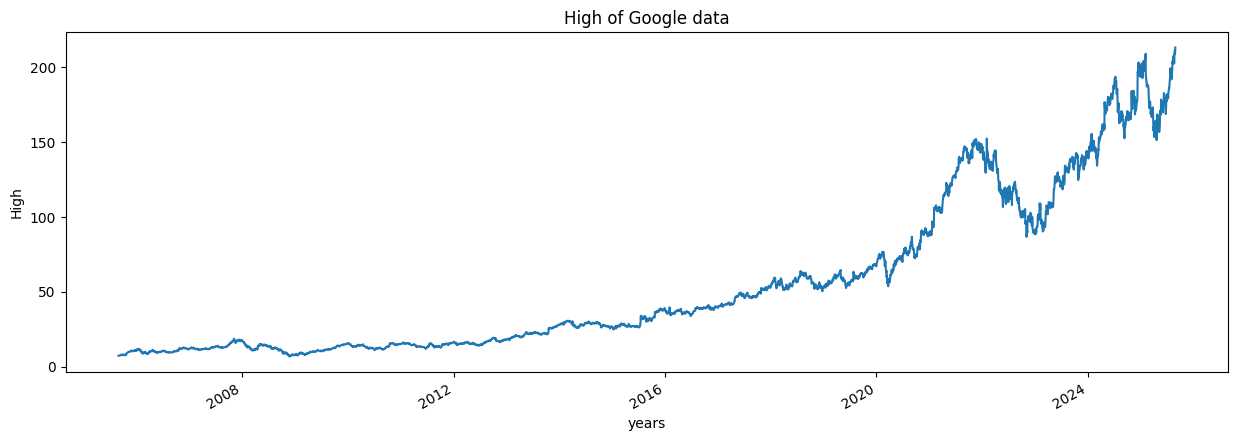

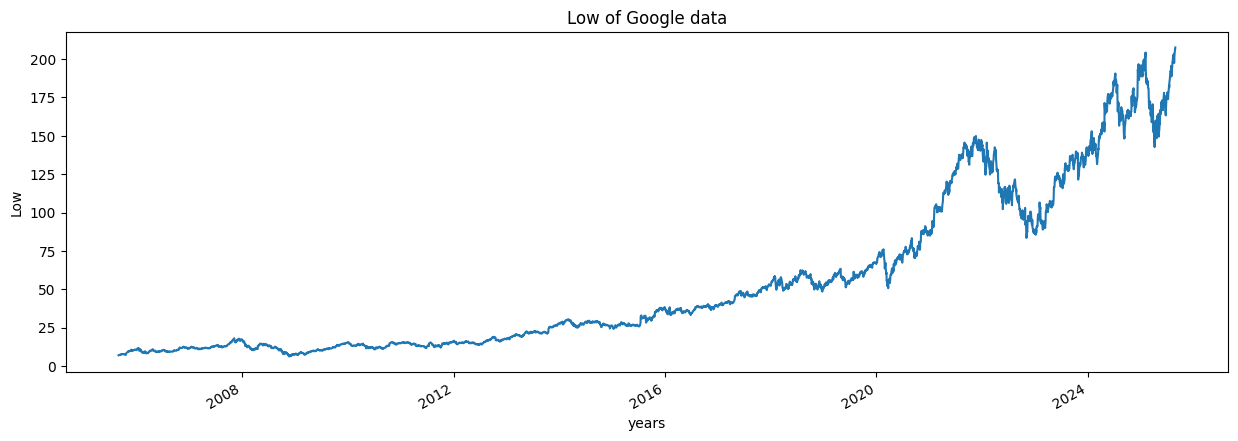

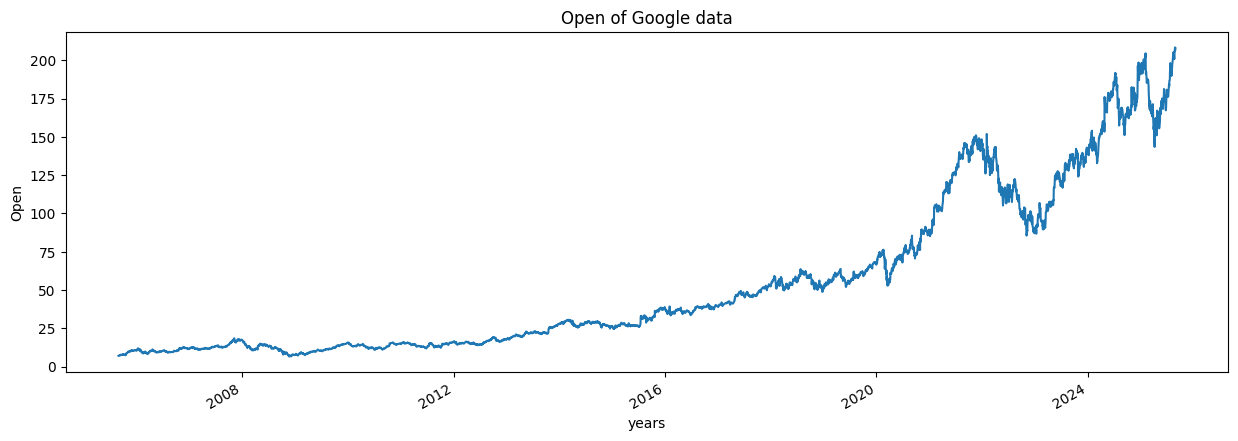

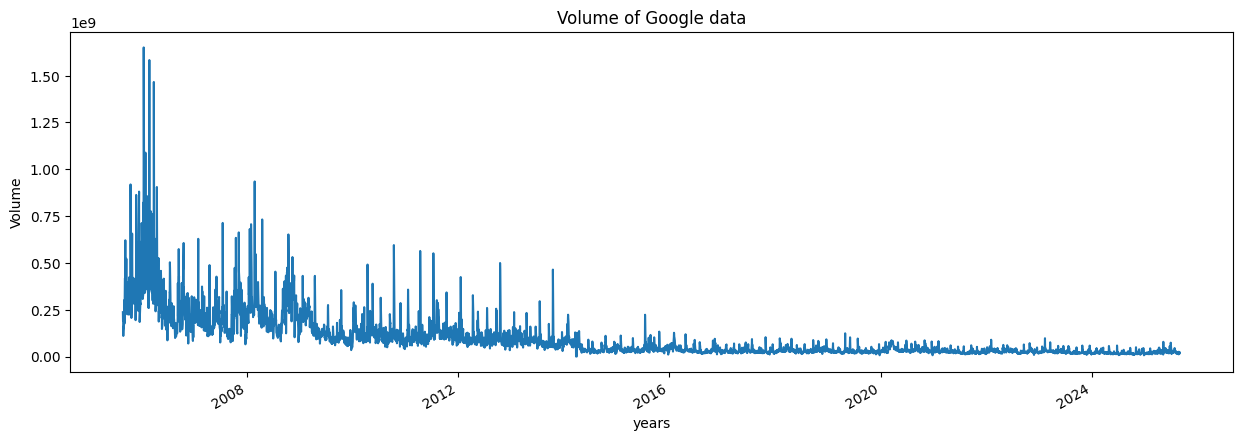

In [163]:
for column in google_data.columns:
    plot_graph((15,5), google_data[column], column)

In [164]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[:5])/5)

30.0


In [165]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [166]:
data["Moving Average"] = data.rolling(5).mean()

In [167]:
for i in range(2005, 2025):
    print(i, list(google_data.index.year).count(i))

2005 87
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [168]:
google_data["MA_for_250_days"] = google_data["Adj Close"].rolling(250).mean()

In [169]:
google_data["MA_for_250_days"][0:250].tail()

Date
2006-08-18         NaN
2006-08-21         NaN
2006-08-22         NaN
2006-08-23         NaN
2006-08-24    9.430021
Name: MA_for_250_days, dtype: float64

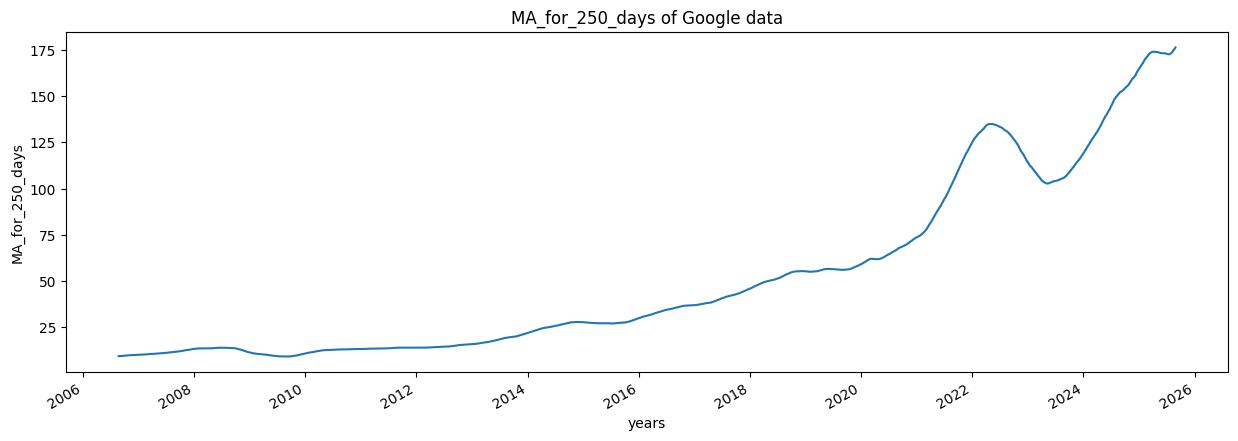

In [170]:
plot_graph((15,5), google_data["MA_for_250_days"], "MA_for_250_days")

<Figure size 640x480 with 0 Axes>

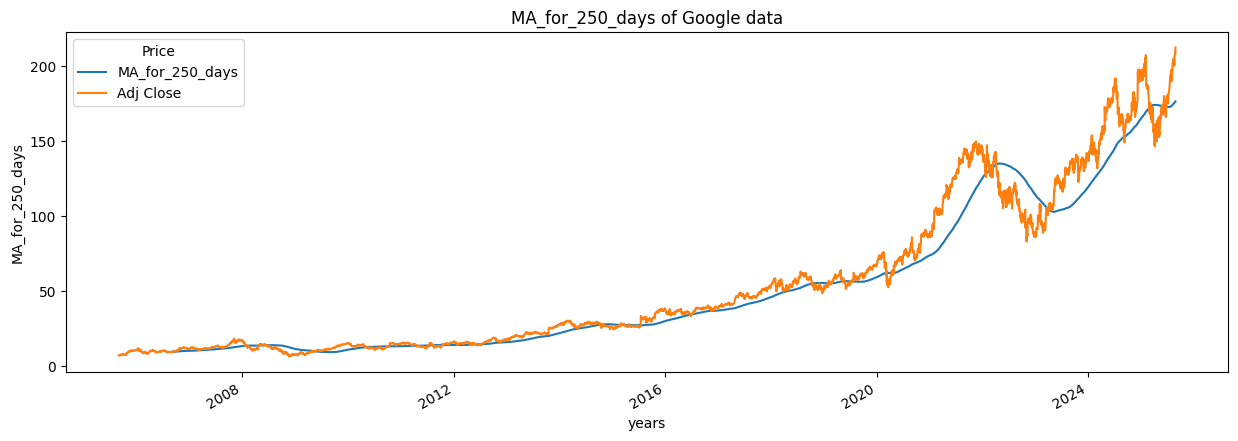

In [171]:
plot_graph((15,5), google_data[["MA_for_250_days", "Adj Close"]], "MA_for_250_days")

<Figure size 640x480 with 0 Axes>

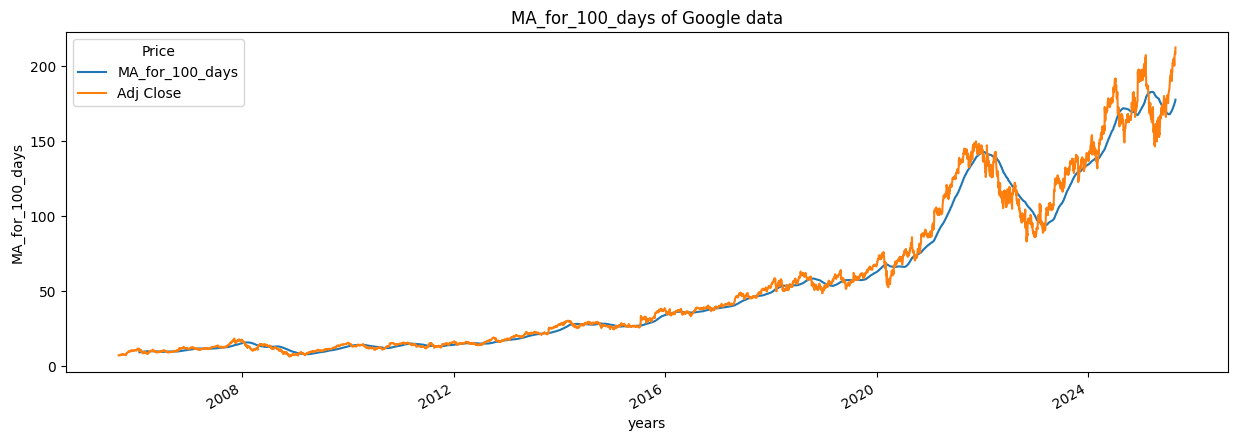

In [172]:
google_data["MA_for_100_days"] = google_data["Adj Close"].rolling(100).mean()
plot_graph((15,5), google_data[["MA_for_100_days", "Adj Close"]], "MA_for_100_days")


<Figure size 640x480 with 0 Axes>

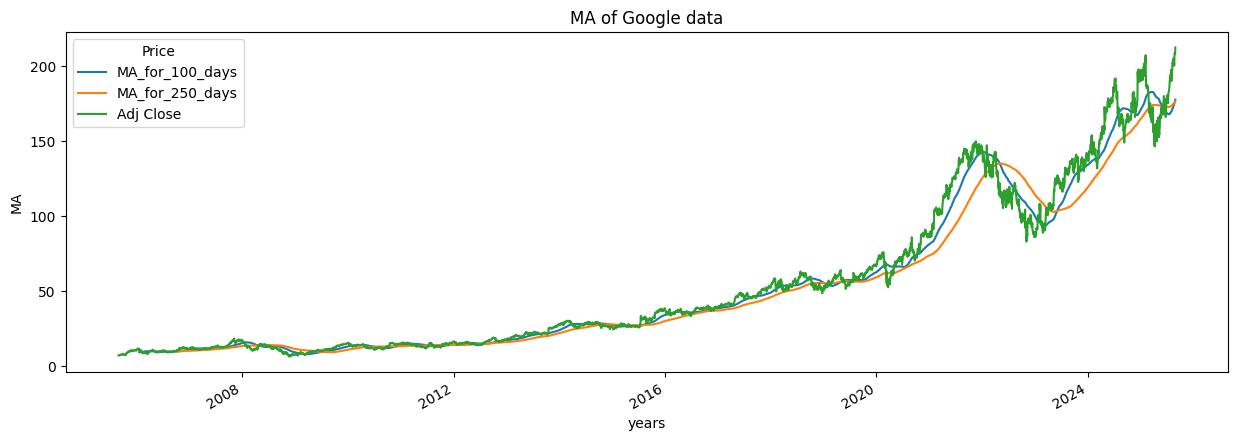

In [173]:
plot_graph((15,5), google_data[["MA_for_100_days", "MA_for_250_days","Adj Close"]], "MA")

In [174]:
google_data["percentage_change_cp"] = google_data["Adj Close"].pct_change()
google_data[["Adj Close","percentage_change_cp"]].head()

Price,Adj Close,percentage_change_cp
Date,,
2005-08-29,7.141869,NaN
2005-08-30,7.112654,-0.004091
2005-08-31,7.081209,-0.004421
2005-09-01,7.087398,0.000874
2005-09-02,7.141869,0.007686


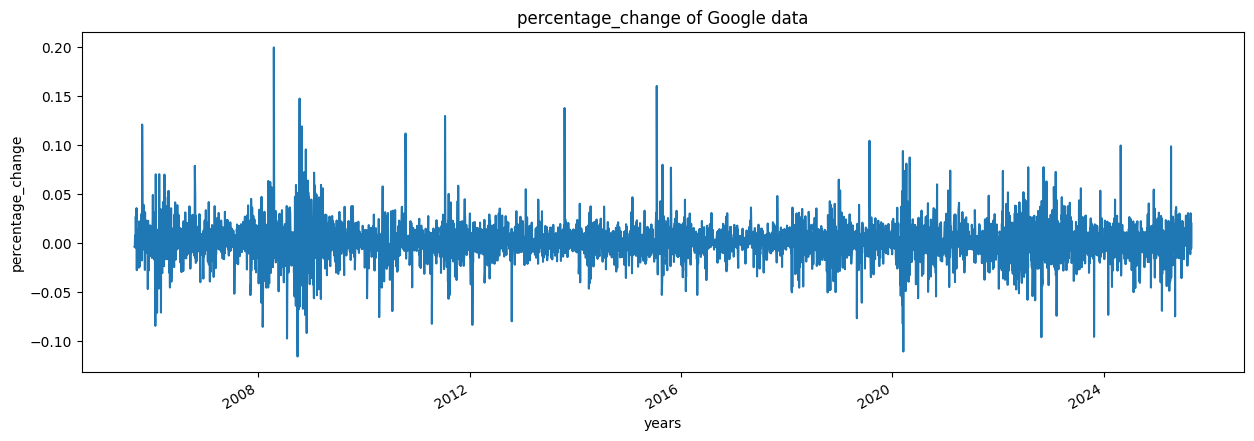

In [175]:
plot_graph((15,5), google_data["percentage_change_cp"], "percentage_change")

In [176]:
Adj_close_price = google_data[["Adj Close"]]

In [177]:
max(Adj_close_price.values), min(Adj_close_price.values)

(array([212.36999512]), array([6.37407684]))

In [178]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.00372722],
       [0.0035854 ],
       [0.00343275],
       ...,
       [0.97854327],
       [0.97980548],
       [1.        ]], shape=(5032, 1))

In [179]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [180]:
x_data[0], y_data[0]

(array([[0.00372722],
        [0.0035854 ],
        [0.00343275],
        [0.00346279],
        [0.00372722],
        [0.00356616],
        [0.00449886],
        [0.00456137],
        [0.00500609],
        [0.00628615],
        [0.00651933],
        [0.00547604],
        [0.00543037],
        [0.0051395 ],
        [0.005571  ],
        [0.00606619],
        [0.00654577],
        [0.00648207],
        [0.00696164],
        [0.00683183],
        [0.00679096],
        [0.00583662],
        [0.00627172],
        [0.00709385],
        [0.00736069],
        [0.0064376 ],
        [0.00640274],
        [0.00664794],
        [0.00667678],
        [0.00639552],
        [0.00584864],
        [0.00523205],
        [0.00480777],
        [0.00465151],
        [0.00571643],
        [0.0055097 ],
        [0.00616115],
        [0.00550008],
        [0.0099112 ],
        [0.01096289],
        [0.01075376],
        [0.01177901],
        [0.01149296],
        [0.01210715],
        [0.01378626],
        [0

In [181]:
int(len(x_data)*0.7)

3452

In [182]:
5032 - int(len(x_data)*0.7) - 100

1480

In [183]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [184]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3452, 100, 1) (3452, 1)
(1480, 100, 1) (1480, 1)


In [185]:
!pip install keras
!pip install tensorflow



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/f9/37/b97abb360b551fbf5870a0ee07e39ff9c655e6e3e2f839bc88be81361842/tensorflow-2.20.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/b8/25/155f9f080d5e4bc0082edfda032ea2bc2b8fab3f4d25d46c1e9dd22a1a89/flatbuffers-25.2.10-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.1,!=0.5.2,>=0.2.1 from https://files.pythonhosted.org/packages/a3/61/8001b38461d751cd1a0c3a6ae84346796a5758123f3ed97a1b121dfbf4f3/gast-0.6.0-py3-none-any.whl.metadata
  Obtaining dependency information for google_pasta>=0.1.1 from https://files.pythonhosted.org/packages/a3/de/c648ef6835192


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [187]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [188]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

C:\Users\Magi\Documents\GitHub\EDA-Projects\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [189]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [190]:
model.fit(x_train, y_train, epochs=2, batch_size=1)

Epoch 1/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - loss: 1.0559e-04
Epoch 2/2
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 88s 26ms/step - loss: 5.4835e-05


In [191]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [192]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step


In [193]:
predictions

array([[0.27452126],
       [0.27474177],
       [0.27571028],
       ...,
       [0.949674  ],
       [0.9541021 ],
       [0.95533603]], shape=(1480, 1), dtype=float32)

In [195]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 62.924335],
       [ 62.96976 ],
       [ 63.16927 ],
       ...,
       [202.00305 ],
       [202.91522 ],
       [203.1694  ]], shape=(1480, 1), dtype=float32)

In [196]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 59.76027679],
       [ 60.07639313],
       [ 60.41339493],
       ...,
       [207.94999695],
       [208.21000671],
       [212.36999512]], shape=(1480, 1))

In [197]:
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))

In [198]:
rmse

np.float64(4.144335052744145)

In [199]:
ploting_data = pd.DataFrame(
    data={
        "original_test_data": inv_y_test.reshape(-1),
        "predictions": inv_predictions.reshape(-1)
    },
    index=google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-10-09,59.760277,62.924335
2019-10-10,60.076393,62.969761
2019-10-11,60.413395,63.169270
2019-10-14,60.497395,63.450321
2019-10-15,61.783249,63.649586


<Figure size 640x480 with 0 Axes>

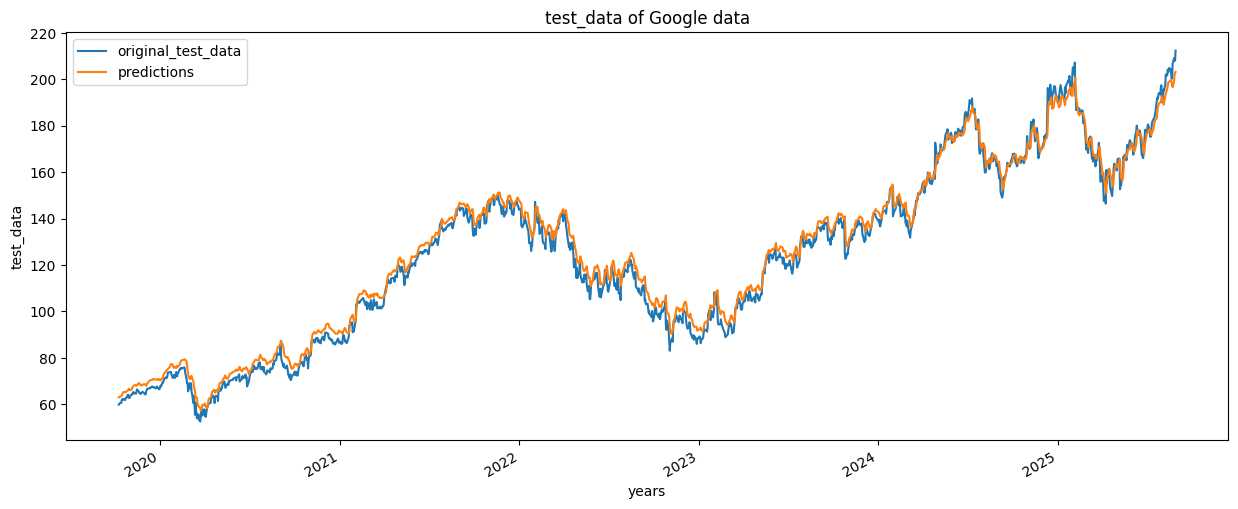

In [201]:
plot_graph((15,6), ploting_data, "test_data")

<Figure size 640x480 with 0 Axes>

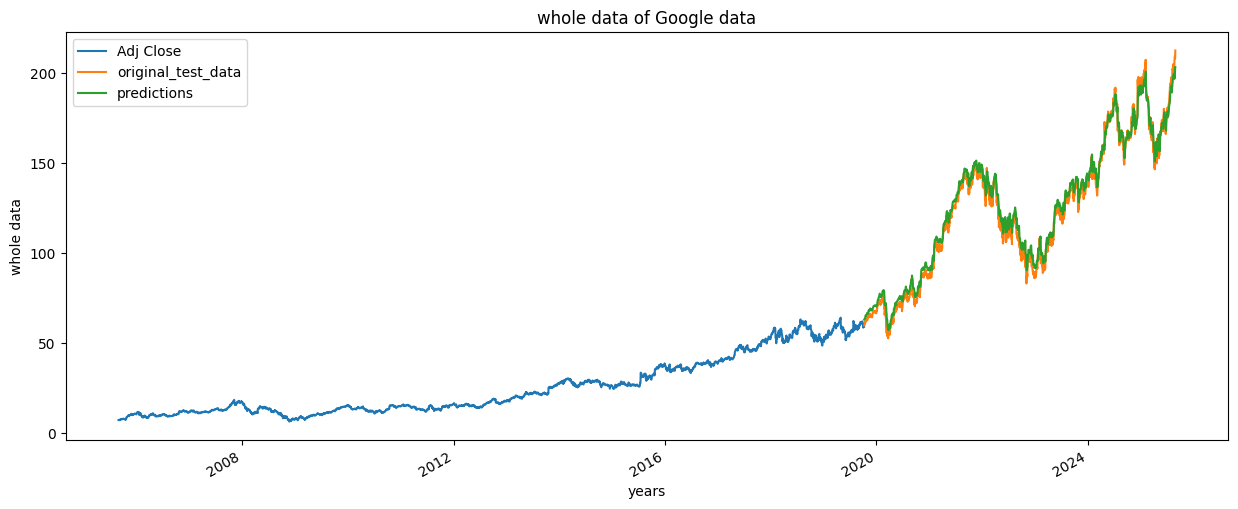

In [202]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100], ploting_data], axis=0), "whole data")

In [203]:
model.save("Latest_stock_price_model.keras")